## Creation of the Datasets

### Cleveland

In [78]:
import pandas as pd

processed_cleveland_df = pd.read_csv("Important_files\\processed.cleveland.data", header=None, names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restECG", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])

print(processed_cleveland_df)

      age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal num
0    63.0  1.0  1.0     145.0  233.0  1.0  ...    0.0      2.3    3.0  0.0   6.0   0
1    67.0  1.0  4.0     160.0  286.0  0.0  ...    1.0      1.5    2.0  3.0   3.0   2
2    67.0  1.0  4.0     120.0  229.0  0.0  ...    1.0      2.6    2.0  2.0   7.0   1
3    37.0  1.0  3.0     130.0  250.0  0.0  ...    0.0      3.5    3.0  0.0   3.0   0
4    41.0  0.0  2.0     130.0  204.0  0.0  ...    0.0      1.4    1.0  0.0   3.0   0
..    ...  ...  ...       ...    ...  ...  ...    ...      ...    ...  ...   ...  ..
298  45.0  1.0  1.0     110.0  264.0  0.0  ...    0.0      1.2    2.0  0.0   7.0   1
299  68.0  1.0  4.0     144.0  193.0  1.0  ...    0.0      3.4    2.0  2.0   7.0   2
300  57.0  1.0  4.0     130.0  131.0  0.0  ...    1.0      1.2    2.0  1.0   7.0   3
301  57.0  0.0  2.0     130.0  236.0  0.0  ...    0.0      0.0    2.0  1.0   3.0   1
302  38.0  1.0  3.0     138.0  175.0  0.0  ...    0.0      0.0   

In [79]:
processed_cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restECG   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [80]:
processed_cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [81]:
processed_cleveland_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restECG     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [82]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# === Replace ? with NaN and copy dataset
processed_cleveland_df = processed_cleveland_df.replace("?", np.nan)
updated_processed_cleveland_df = processed_cleveland_df.copy()

# === Add missing indicator columns just before the last column
for col in ["ca", "thal"]:
    missing_col = updated_processed_cleveland_df[col].isna().astype(int)
    penult_pos = len(updated_processed_cleveland_df.columns) - 1
    updated_processed_cleveland_df.insert(penult_pos, f"missing_{col}", missing_col)

# === Convert to float for imputation
updated_processed_cleveland_df[["ca", "thal"]] = updated_processed_cleveland_df[["ca", "thal"]].astype(float)

# === Apply Iterative Imputer
iter_imputer = IterativeImputer(max_iter=10, random_state=42)
updated_processed_cleveland_df[["ca", "thal"]] = iter_imputer.fit_transform(
    updated_processed_cleveland_df[["ca", "thal"]]
)

updated_processed_cleveland_df


,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_ca,missing_thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,0,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,0,0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,0,0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,0,0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,0,0,1


In [83]:
updated_processed_cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    float64
 1   sex           303 non-null    float64
 2   cp            303 non-null    float64
 3   trestbps      303 non-null    float64
 4   chol          303 non-null    float64
 5   fbs           303 non-null    float64
 6   restECG       303 non-null    float64
 7   thalach       303 non-null    float64
 8   exang         303 non-null    float64
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    float64
 11  ca            303 non-null    float64
 12  thal          303 non-null    float64
 13  missing_ca    303 non-null    int32  
 14  missing_thal  303 non-null    int32  
 15  num           303 non-null    int64  
dtypes: float64(13), int32(2), int64(1)
memory usage: 35.6 KB


In [84]:
updated_processed_cleveland_df["num"].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

### Hungarian

In [85]:
import pandas as pd

processed_hungarian_df = pd.read_csv("Important_files\\processed.hungarian.data", names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restECG", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])

processed_hungarian_df

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [86]:
processed_hungarian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restECG   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

possible_nan_list = ["trestbps", "chol", "fbs", "restECG", "thalach", "exang", "slope", "ca", "thal"]

processed_hungarian_df[possible_nan_list] = processed_hungarian_df[possible_nan_list].replace("?", np.nan)

updated_processed_hungarian_df = processed_hungarian_df.copy()

# === Inserting missing cols ===

for col in possible_nan_list:
    missing_col = updated_processed_hungarian_df[col].isna().astype(int)
    secondtolast_pos = len(updated_processed_hungarian_df.columns) - 1
    updated_processed_hungarian_df.insert(secondtolast_pos, f"missing_{col}", missing_col)


updated_processed_hungarian_df[possible_nan_list] = updated_processed_hungarian_df[possible_nan_list].astype(float)

# === Apply Iterative Imputer ===
iter_imputer = IterativeImputer(max_iter=10, random_state=42)
updated_processed_hungarian_df[possible_nan_list] = iter_imputer.fit_transform(updated_processed_hungarian_df[possible_nan_list])

updated_processed_hungarian_df

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_trestbps,missing_chol,missing_fbs,missing_restECG,missing_thalach,missing_exang,missing_slope,missing_ca,missing_thal,num
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.526803,0.0,5.117102,0,0,0,0,0,0,1,1,1,0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.681385,0.0,5.268098,0,0,0,0,0,0,1,1,1,0
2,29,1,2,140.0,245.116952,0.0,0.0,170.0,0.0,0.0,1.641664,0.0,5.242724,0,1,0,0,0,0,1,1,1,0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.565597,0.0,6.000000,0,0,0,0,0,0,1,1,0,0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.683792,0.0,5.331440,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,2.022363,0.0,6.504947,0,0,0,0,0,0,1,1,1,1
290,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.000000,0.0,6.251734,0,0,0,0,0,0,0,1,1,1
291,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.000000,0.0,5.516103,0,0,0,0,0,0,0,1,1,1
292,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.000000,0.0,7.000000,0,0,0,0,0,0,0,1,0,1


In [88]:
processed_hungarian_df

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [89]:
updated_processed_hungarian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               294 non-null    int64  
 1   sex               294 non-null    int64  
 2   cp                294 non-null    int64  
 3   trestbps          294 non-null    float64
 4   chol              294 non-null    float64
 5   fbs               294 non-null    float64
 6   restECG           294 non-null    float64
 7   thalach           294 non-null    float64
 8   exang             294 non-null    float64
 9   oldpeak           294 non-null    float64
 10  slope             294 non-null    float64
 11  ca                294 non-null    float64
 12  thal              294 non-null    float64
 13  missing_trestbps  294 non-null    int32  
 14  missing_chol      294 non-null    int32  
 15  missing_fbs       294 non-null    int32  
 16  missing_restECG   294 non-null    int32  
 1

### Switzerland

In [90]:
processed_switzerland_df = pd.read_csv("Important_files\processed.switzerland.data", names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restECG", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])

processed_switzerland_df

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\samue\AppData\Local\Temp\ipykernel_23272\2999002513.py:1: SyntaxWarning: invalid escape sequence '\p'
  processed_switzerland_df = pd.read_csv("Important_files\processed.switzerland.data", names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restECG", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])


,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


In [91]:
processed_switzerland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       123 non-null    int64 
 1   sex       123 non-null    int64 
 2   cp        123 non-null    int64 
 3   trestbps  123 non-null    object
 4   chol      123 non-null    int64 
 5   fbs       123 non-null    object
 6   restECG   123 non-null    object
 7   thalach   123 non-null    object
 8   exang     123 non-null    object
 9   oldpeak   123 non-null    object
 10  slope     123 non-null    object
 11  ca        123 non-null    object
 12  thal      123 non-null    object
 13  num       123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [92]:
from sklearn.impute import IterativeImputer

processed_switzerland_df = processed_switzerland_df.replace("?", np.nan)
possible_nan_list = ["trestbps", "fbs", "restECG", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

updated_processed_switzerland_df = processed_switzerland_df.copy()

# === Inserting missing cols ===

for col in possible_nan_list:
    missing_col = updated_processed_switzerland_df[col].isna().astype(int)
    secondtolast_pos = len(updated_processed_switzerland_df.columns) - 1
    updated_processed_switzerland_df.insert(secondtolast_pos, f"missing_{col}", missing_col)

updated_processed_switzerland_df[possible_nan_list] = updated_processed_switzerland_df[possible_nan_list].astype(float)


# === Inserting missing values

iter_imputer = IterativeImputer(max_iter=10, random_state=42)
updated_processed_switzerland_df[possible_nan_list] = iter_imputer.fit_transform(updated_processed_switzerland_df[possible_nan_list])

updated_processed_switzerland_df

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_trestbps,missing_fbs,missing_restECG,missing_thalach,missing_exang,missing_oldpeak,missing_slope,missing_ca,missing_thal,num
0,32,1,1,95.000000,0,0.095108,0.000000,127.0,0.0,0.700000,1.000000,1.185015,6.001193,0,1,0,0,0,0,0,1,1,1
1,34,1,4,115.000000,0,0.142516,0.331888,154.0,0.0,0.200000,1.000000,1.030571,5.973165,0,1,1,0,0,0,0,1,1,1
2,35,1,4,128.922142,0,0.120375,0.000000,130.0,1.0,0.693237,1.777597,1.101450,7.000000,1,1,0,0,0,1,1,1,0,3
3,36,1,4,110.000000,0,0.101979,0.000000,125.0,1.0,1.000000,2.000000,0.904592,6.000000,0,1,0,0,0,0,0,1,0,1
4,38,0,4,105.000000,0,0.152012,0.000000,166.0,0.0,2.800000,1.000000,-0.212774,6.042835,0,1,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.000000,0,0.000000,1.000000,92.0,1.0,0.000000,2.000000,2.157891,7.000000,0,0,0,0,0,0,0,1,0,1
119,70,1,4,140.000000,0,1.000000,0.000000,157.0,1.0,2.000000,2.000000,0.185315,7.000000,0,0,0,0,0,0,0,1,0,3
120,72,1,3,160.000000,0,0.119274,2.000000,114.0,0.0,1.600000,2.000000,2.000000,5.695410,0,1,0,0,0,0,0,0,1,0
121,73,0,3,160.000000,0,0.000000,1.000000,121.0,0.0,0.000000,1.000000,2.318249,3.000000,0,0,0,0,0,0,0,1,0,1


In [93]:
updated_processed_switzerland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               123 non-null    int64  
 1   sex               123 non-null    int64  
 2   cp                123 non-null    int64  
 3   trestbps          123 non-null    float64
 4   chol              123 non-null    int64  
 5   fbs               123 non-null    float64
 6   restECG           123 non-null    float64
 7   thalach           123 non-null    float64
 8   exang             123 non-null    float64
 9   oldpeak           123 non-null    float64
 10  slope             123 non-null    float64
 11  ca                123 non-null    float64
 12  thal              123 non-null    float64
 13  missing_trestbps  123 non-null    int32  
 14  missing_fbs       123 non-null    int32  
 15  missing_restECG   123 non-null    int32  
 16  missing_thalach   123 non-null    int32  
 1

### VA

In [94]:
processed_va_df = pd.read_csv("Important_files\processed.va.data", names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restECG", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])

processed_va_df

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\samue\AppData\Local\Temp\ipykernel_23272\4215688068.py:1: SyntaxWarning: invalid escape sequence '\p'
  processed_va_df = pd.read_csv("Important_files\processed.va.data", names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restECG", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])


,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [95]:
processed_va_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restECG   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [96]:
from sklearn.impute import IterativeImputer

possible_nan_list = ["trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

processed_va_df = processed_va_df.replace("?", np.nan)
updated_processed_va_df = processed_va_df.copy()

# === Inserting missing cols ===

for col in possible_nan_list:
    missing_col = updated_processed_va_df[col].isna().astype(int)
    secondtolast_pos = len(updated_processed_va_df.columns) - 1
    updated_processed_va_df.insert(secondtolast_pos, f"missing_{col}", missing_col)


# === Infering missing values ===

iter_imputer = IterativeImputer(max_iter=10, random_state=42)
updated_processed_va_df[possible_nan_list] = iter_imputer.fit_transform(updated_processed_va_df[possible_nan_list])

updated_processed_va_df


,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_trestbps,missing_chol,missing_fbs,missing_thalach,missing_exang,missing_oldpeak,missing_slope,missing_ca,missing_thal,num
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2.000000,0.0,6.367344,0,0,0,0,0,0,0,1,1,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,2.142169,0.0,6.099668,0,0,0,0,0,0,1,1,1,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,3.000000,0.0,5.904798,0,0,0,0,0,0,0,1,1,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1.000000,0.0,5.855550,0,0,0,0,0,0,0,1,1,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,2.000000,0.0,6.323260,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.000000,0.000000,2.150586,0.0,5.448482,0,0,0,0,0,0,1,1,1,1
196,62,1,1,130.189488,139.0,0.0,1,121.809575,0.681853,1.373869,2.124863,0.0,6.295259,1,0,0,1,1,1,1,1,1,0
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2.172972,0.0,6.000000,0,0,0,0,0,0,1,1,0,2
198,58,1,4,145.068734,385.0,1.0,2,122.821526,0.653097,1.245680,2.217118,0.0,6.052792,1,0,0,1,1,1,1,1,1,0


In [97]:
updated_processed_va_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               200 non-null    int64  
 1   sex               200 non-null    int64  
 2   cp                200 non-null    int64  
 3   trestbps          200 non-null    float64
 4   chol              200 non-null    float64
 5   fbs               200 non-null    float64
 6   restECG           200 non-null    int64  
 7   thalach           200 non-null    float64
 8   exang             200 non-null    float64
 9   oldpeak           200 non-null    float64
 10  slope             200 non-null    float64
 11  ca                200 non-null    float64
 12  thal              200 non-null    float64
 13  missing_trestbps  200 non-null    int32  
 14  missing_chol      200 non-null    int32  
 15  missing_fbs       200 non-null    int32  
 16  missing_thalach   200 non-null    int32  
 1

## Train sets

I am going to use the Cleveland, hungarian and switzerland dataset as train set and the va as test set

In [98]:

train_df = pd.concat([updated_processed_cleveland_df, updated_processed_hungarian_df, updated_processed_switzerland_df], axis=0).replace(np.nan, 0)

train_df

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_ca,missing_thal,num,missing_trestbps,missing_chol,missing_fbs,missing_restECG,missing_thalach,missing_exang,missing_slope,missing_oldpeak
0,63.0,1.0,1.0,145.0,233.0,1.000000,2.0,150.0,0.0,2.3,3.0,0.000000,6.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.000000,2.0,108.0,1.0,1.5,2.0,3.000000,3.000000,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.000000,2.0,129.0,1.0,2.6,2.0,2.000000,7.000000,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37.0,1.0,3.0,130.0,250.0,0.000000,0.0,187.0,0.0,3.5,3.0,0.000000,3.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.000000,2.0,172.0,0.0,1.4,1.0,0.000000,3.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.000000,1.0,92.0,1.0,0.0,2.0,2.157891,7.000000,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,70.0,1.0,4.0,140.0,0.0,1.000000,0.0,157.0,1.0,2.0,2.0,0.185315,7.000000,1,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,72.0,1.0,3.0,160.0,0.0,0.119274,2.0,114.0,0.0,1.6,2.0,2.000000,5.695410,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
121,73.0,0.0,3.0,160.0,0.0,0.000000,1.0,121.0,0.0,0.0,1.0,2.318249,3.000000,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Balance classes distribution

In [99]:
train_df["num"].value_counts()

num
0    360
1    209
2     68
3     65
4     18
Name: count, dtype: int64

In [100]:
X_train = pd.concat([train_df.loc[:, :"missing_thal"], train_df.loc[:, "missing_trestbps":]], axis=1)
y_train = train_df.loc[:, "num"]

In [101]:
X_train

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_ca,missing_thal,missing_trestbps,missing_chol,missing_fbs,missing_restECG,missing_thalach,missing_exang,missing_slope,missing_oldpeak
0,63.0,1.0,1.0,145.0,233.0,1.000000,2.0,150.0,0.0,2.3,3.0,0.000000,6.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.000000,2.0,108.0,1.0,1.5,2.0,3.000000,3.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.000000,2.0,129.0,1.0,2.6,2.0,2.000000,7.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37.0,1.0,3.0,130.0,250.0,0.000000,0.0,187.0,0.0,3.5,3.0,0.000000,3.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.000000,2.0,172.0,0.0,1.4,1.0,0.000000,3.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.000000,1.0,92.0,1.0,0.0,2.0,2.157891,7.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,70.0,1.0,4.0,140.0,0.0,1.000000,0.0,157.0,1.0,2.0,2.0,0.185315,7.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,72.0,1.0,3.0,160.0,0.0,0.119274,2.0,114.0,0.0,1.6,2.0,2.000000,5.695410,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
121,73.0,0.0,3.0,160.0,0.0,0.000000,1.0,121.0,0.0,0.0,1.0,2.318249,3.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
y_train

0      0
1      2
2      1
3      0
4      0
      ..
118    1
119    3
120    0
121    1
122    1
Name: num, Length: 720, dtype: int64

The classes are very unbalanced, we need to solve this.

Three main approaches:

1. SMOTE: Generates synthetical samples, useful for small datasets
2. Undersampling: reduces the number of samples from the dominant class
3. Using the class_weight = 'balanced' parameter given in certain models


In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_rebalanced, y_train_rebalanced = smote.fit_resample(X_train, y_train)

y_train_rebalanced.value_counts()

num
0    360
2    360
1    360
3    360
4    360
Name: count, dtype: int64

In [104]:
X_train_rebalanced, y_train_rebalanced

(            age  sex        cp  ...  missing_exang  missing_slope  missing_oldpeak
 0     63.000000  1.0  1.000000  ...            0.0            0.0              0.0
 1     67.000000  1.0  4.000000  ...            0.0            0.0              0.0
 2     67.000000  1.0  4.000000  ...            0.0            0.0              0.0
 3     37.000000  1.0  3.000000  ...            0.0            0.0              0.0
 4     41.000000  0.0  2.000000  ...            0.0            0.0              0.0
 ...         ...  ...       ...  ...            ...            ...              ...
 1795  39.822832  1.0  1.455708  ...            0.0            0.0              0.0
 1796  59.472901  1.0  4.000000  ...            0.0            0.0              0.0
 1797  57.359125  1.0  4.000000  ...            0.0            0.0              0.0
 1798  56.091281  1.0  4.000000  ...            0.0            0.0              0.0
 1799  54.580329  1.0  4.000000  ...            0.0            0.0          

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

y_res.value_counts()

num
0    18
1    18
2    18
3    18
4    18
Name: count, dtype: int64

I chose to use the augmented dataset

## Test set

In [105]:
updated_processed_va_df

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_trestbps,missing_chol,missing_fbs,missing_thalach,missing_exang,missing_oldpeak,missing_slope,missing_ca,missing_thal,num
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2.000000,0.0,6.367344,0,0,0,0,0,0,0,1,1,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,2.142169,0.0,6.099668,0,0,0,0,0,0,1,1,1,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,3.000000,0.0,5.904798,0,0,0,0,0,0,0,1,1,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1.000000,0.0,5.855550,0,0,0,0,0,0,0,1,1,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,2.000000,0.0,6.323260,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.000000,0.000000,2.150586,0.0,5.448482,0,0,0,0,0,0,1,1,1,1
196,62,1,1,130.189488,139.0,0.0,1,121.809575,0.681853,1.373869,2.124863,0.0,6.295259,1,0,0,1,1,1,1,1,1,0
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2.172972,0.0,6.000000,0,0,0,0,0,0,1,1,0,2
198,58,1,4,145.068734,385.0,1.0,2,122.821526,0.653097,1.245680,2.217118,0.0,6.052792,1,0,0,1,1,1,1,1,1,0


In [108]:
X_test = updated_processed_va_df.loc[:, :"missing_thal"]
X_test

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_trestbps,missing_chol,missing_fbs,missing_thalach,missing_exang,missing_oldpeak,missing_slope,missing_ca,missing_thal
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2.000000,0.0,6.367344,0,0,0,0,0,0,0,1,1
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,2.142169,0.0,6.099668,0,0,0,0,0,0,1,1,1
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,3.000000,0.0,5.904798,0,0,0,0,0,0,0,1,1
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1.000000,0.0,5.855550,0,0,0,0,0,0,0,1,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,2.000000,0.0,6.323260,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.000000,0.000000,2.150586,0.0,5.448482,0,0,0,0,0,0,1,1,1
196,62,1,1,130.189488,139.0,0.0,1,121.809575,0.681853,1.373869,2.124863,0.0,6.295259,1,0,0,1,1,1,1,1,1
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2.172972,0.0,6.000000,0,0,0,0,0,0,1,1,0
198,58,1,4,145.068734,385.0,1.0,2,122.821526,0.653097,1.245680,2.217118,0.0,6.052792,1,0,0,1,1,1,1,1,1


In [109]:
y_test = updated_processed_va_df["num"]
y_test

0      2
1      0
2      2
3      1
4      0
      ..
195    1
196    0
197    2
198    0
199    1
Name: num, Length: 200, dtype: int64

In [110]:
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Riordina le colonne del test come nel train
X_test = X_test[X_train.columns]
X_test


,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_ca,missing_thal,missing_trestbps,missing_chol,missing_fbs,missing_restECG,missing_thalach,missing_exang,missing_slope,missing_oldpeak
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.000000,3.000000,2.000000,0.0,6.367344,1,1,0,0,0,0,0,0,0,0
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.000000,0.000000,2.142169,0.0,6.099668,1,1,0,0,0,0,0,0,1,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.000000,1.500000,3.000000,0.0,5.904798,1,1,0,0,0,0,0,0,0,0
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.000000,2.500000,1.000000,0.0,5.855550,1,1,0,0,0,0,0,0,0,0
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.000000,1.300000,2.000000,0.0,6.323260,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.000000,0.000000,2.150586,0.0,5.448482,1,1,0,0,0,0,0,0,1,0
196,62,1,1,130.189488,139.0,0.0,1,121.809575,0.681853,1.373869,2.124863,0.0,6.295259,1,1,1,0,0,0,1,1,1,1
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.000000,0.000000,2.172972,0.0,6.000000,1,0,0,0,0,0,0,0,1,0
198,58,1,4,145.068734,385.0,1.0,2,122.821526,0.653097,1.245680,2.217118,0.0,6.052792,1,1,1,0,0,0,1,1,1,1


In [111]:
X_train

,age,sex,cp,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,missing_ca,missing_thal,missing_trestbps,missing_chol,missing_fbs,missing_restECG,missing_thalach,missing_exang,missing_slope,missing_oldpeak
0,63.0,1.0,1.0,145.0,233.0,1.000000,2.0,150.0,0.0,2.3,3.0,0.000000,6.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.000000,2.0,108.0,1.0,1.5,2.0,3.000000,3.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.000000,2.0,129.0,1.0,2.6,2.0,2.000000,7.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37.0,1.0,3.0,130.0,250.0,0.000000,0.0,187.0,0.0,3.5,3.0,0.000000,3.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.000000,2.0,172.0,0.0,1.4,1.0,0.000000,3.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.000000,1.0,92.0,1.0,0.0,2.0,2.157891,7.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,70.0,1.0,4.0,140.0,0.0,1.000000,0.0,157.0,1.0,2.0,2.0,0.185315,7.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,72.0,1.0,3.0,160.0,0.0,0.119274,2.0,114.0,0.0,1.6,2.0,2.000000,5.695410,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
121,73.0,0.0,3.0,160.0,0.0,0.000000,1.0,121.0,0.0,0.0,1.0,2.318249,3.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training


## SVM

### No rebalance


 Performance SVM:
Accuracy: 0.28
F1-score: 0.24115139179309217
              precision    recall  f1-score   support

           0       0.39      0.25      0.31        51
           1       0.27      0.54      0.36        56
           2       1.00      0.02      0.05        41
           3       0.23      0.29      0.25        42
           4       0.00      0.00      0.00        10

    accuracy                           0.28       200
   macro avg       0.38      0.22      0.19       200
weighted avg       0.43      0.28      0.24       200



c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

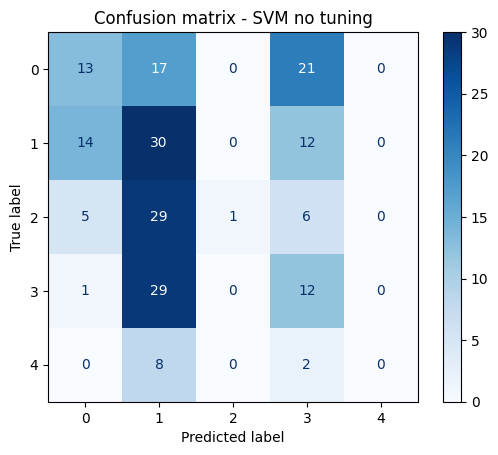

In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline #In this way the SMOTE is used only on the training set
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# === Creation of the classifier ===

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=42))
])

clf = pipeline.fit(X_train, y_train)

y_pred_svm = clf.predict(X_test)

print("\n Performance SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm, average="weighted"))
print(classification_report(y_test, y_pred_svm))

# === Plotting of the results ===
cm = confusion_matrix(y_test, y_pred_svm)
labels = sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion matrix - SVM no tuning & no rebalance")
plt.show()

# === Saving the model ===
#joblib.dump(pipeline, "svm_pipeline.pkl")


### No tuning



 Performance SVM:
Accuracy: 0.255
F1-score: 0.22129869214905146
              precision    recall  f1-score   support

           0       0.35      0.29      0.32        51
           1       0.25      0.43      0.32        56
           2       0.00      0.00      0.00        41
           3       0.21      0.29      0.24        42
           4       0.00      0.00      0.00        10

    accuracy                           0.26       200
   macro avg       0.16      0.20      0.18       200
weighted avg       0.20      0.26      0.22       200



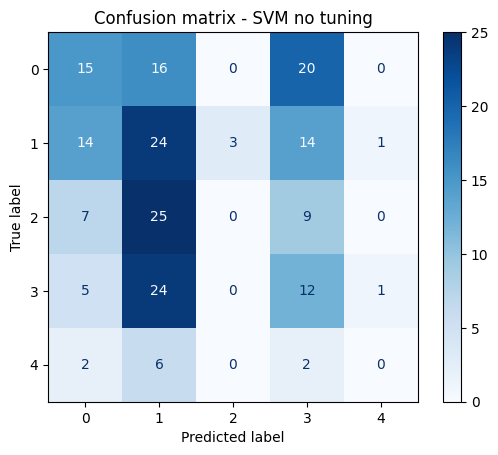

In [113]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline #In this way the SMOTE is used only on the training set
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# === Creation of the classifier ===

pipeline = Pipeline([
    ("rebalance", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=42))
])

clf = pipeline.fit(X_train, y_train)

y_pred_svm = clf.predict(X_test)

print("\n Performance SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm, average="weighted"))
print(classification_report(y_test, y_pred_svm))

# === Plotting of the results ===
cm = confusion_matrix(y_test, y_pred_svm)
labels = sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion matrix - SVM no tuning")
plt.show()

# === Saving the model ===
#joblib.dump(pipeline, "svm_pipeline.pkl")


### Tuning

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Migliori parametri trovati: {'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}

 Performance SVM:
Accuracy: 0.31
F1-score: 0.24040844357695368
              precision    recall  f1-score   support

           0       0.38      0.71      0.50        51
           1       0.26      0.41      0.32        56
           2       0.25      0.02      0.04        41
           3       0.18      0.05      0.08        42
           4       0.00      0.00      0.00        10

    accuracy                           0.31       200
   macro avg       0.21      0.24      0.19       200
weighted avg       0.26      0.31      0.24       200



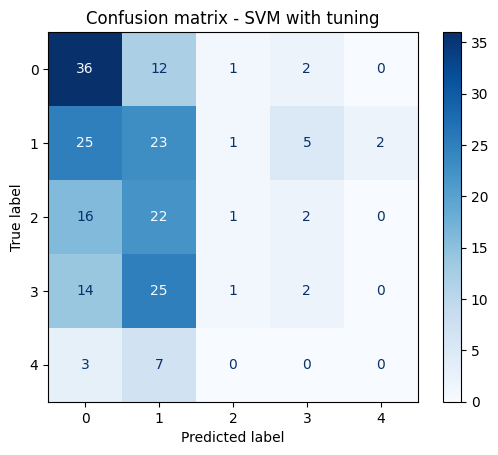

In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline #In this way the SMOTE is used only on the training set
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV

# === Creation of the classifier ===

pipeline = Pipeline([
    ("rebalanced", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=42))
])

param_grid_svm = {
    "svm__C": [0.1, 1, 10, 50, 100],
    "svm__gamma": [1, 0.1, 0.01, 0.001, "scale"],
    "svm__kernel": ["linear", "rbf"]
}

grid_svm = GridSearchCV(
    pipeline,
    param_grid_svm,
    cv = 10,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

clf = grid_svm.fit(X_train, y_train)
print("Migliori parametri trovati:", clf.best_params_)

best_model = clf.best_estimator_


y_pred_svm = best_model.predict(X_test)

print("\n Performance SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm, average="weighted"))
print(classification_report(y_test, y_pred_svm))

# === Plotting of the results ===
cm = confusion_matrix(y_test, y_pred_svm)
labels = sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion matrix - SVM with tuning")
plt.show()

# === Saving the model ===
#joblib.dump(best_model, "svm_pipeline_tuning.pkl")


## Logistic Regression

### No Tuning


 Performance LR:
Accuracy: 0.295
F1-score: 0.24574434647478124
              precision    recall  f1-score   support

           0       0.54      0.25      0.35        51
           1       0.29      0.71      0.41        56
           2       0.40      0.05      0.09        41
           3       0.12      0.07      0.09        42
           4       0.12      0.10      0.11        10

    accuracy                           0.29       200
   macro avg       0.30      0.24      0.21       200
weighted avg       0.33      0.29      0.25       200



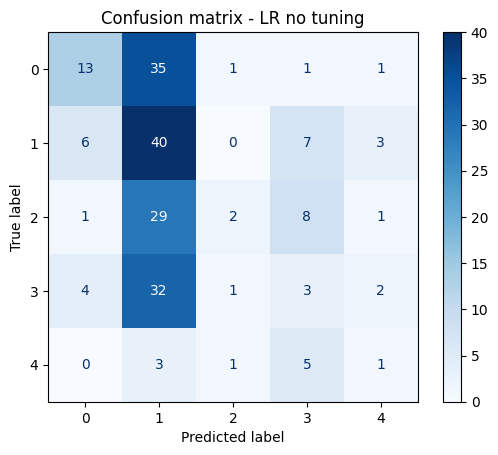

['lr_pipeline.pkl']

In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline #In this way the SMOTE is used only on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# === Creation of the classifier ===

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LogisticRegression(class_weight='balanced', random_state=42))
])

clf = pipeline.fit(X_train, y_train)

y_pred_lr = clf.predict(X_test)

print("\n Performance LR:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr, average="weighted"))
print(classification_report(y_test, y_pred_lr))

# === Plotting of the results ===
cm = confusion_matrix(y_test, y_pred_lr)
labels = sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion matrix - LR no tuning")
plt.show()

# === Saving the model ===
joblib.dump(pipeline, "lr_pipeline.pkl")


## XGBoost

### No rebalance

c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Performance XGB:
Accuracy: 0.305
F1-score: 0.22006203473945413
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        51
           1       0.27      0.73      0.39        56
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        10

    accuracy                           0.30       200
   macro avg       0.15      0.22      0.16       200
weighted avg       0.20      0.30      0.22       200



c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

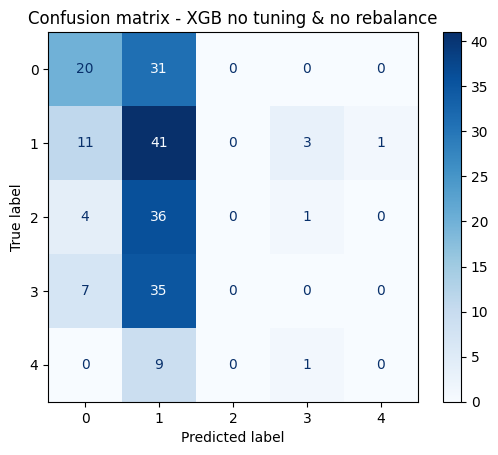

In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline #In this way the SMOTE is used only on the training set
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBClassifier


xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf",XGBClassifier(use_label_encoder = False, eval_metric="mlogloss", random_state = 42))
])

param_grid_xgb = {
    "clf__n_estimators": [100, 200, 400],
    "clf__max_depth": [3, 5, 7],
    "clf__learning_rate": [0.01, 0.03, 0.1, 0.2],
    "clf__subsample":[0.8, 1.0]
}


clf = xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = clf.predict(X_test)

print("\n Performance XGB:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb, average="weighted"))
print(classification_report(y_test, y_pred_xgb))

# === Plotting of the results ===
cm = confusion_matrix(y_test, y_pred_xgb)
labels = sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion matrix - XGB no tuning & no rebalance")
plt.show()

# === Saving the model ===
#joblib.dump(pipeline, "xgb_pipeline.pkl")

### No tuning


c:\Users\samue\OneDrive\Desktop\Samuele\Projects\Heart-Disease-Recognition\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Performance XGB:
Accuracy: 0.3
F1-score: 0.22603296703296702
              precision    recall  f1-score   support

           0       0.39      0.39      0.39        51
           1       0.27      0.68      0.39        56
           2       0.00      0.00      0.00        41
           3       0.14      0.02      0.04        42
           4       0.50      0.10      0.17        10

    accuracy                           0.30       200
   macro avg       0.26      0.24      0.20       200
weighted avg       0.23      0.30      0.23       200



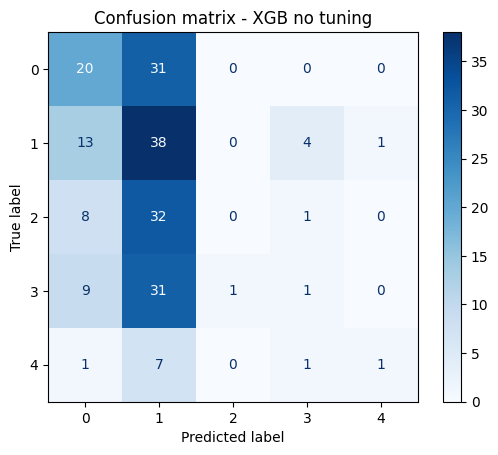

In [120]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline #In this way the SMOTE is used only on the training set
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


xgb_pipeline = Pipeline([
    ("rebalance", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf",XGBClassifier(use_label_encoder = False, eval_metric="mlogloss", random_state = 42))
])


clf = xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = clf.predict(X_test)

print("\n Performance XGB:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb, average="weighted"))
print(classification_report(y_test, y_pred_xgb))

# === Plotting of the results ===
cm = confusion_matrix(y_test, y_pred_xgb)
labels = sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion matrix - XGB no tuning")
plt.show()

# === Saving the model ===
#joblib.dump(pipeline, "xgb_pipeline.pkl")

### Tuning

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# === Pipeline con SMOTE + Scaling + XGBoost ===
xgb_pipeline = Pipeline([
    ("rebalance", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
])

# === Parameters for GridSearch ===
param_grid_xgb = {
    "clf__n_estimators": [100, 200, 400, 600],                # numero di alberi
    "clf__max_depth": [3, 5, 7, 9],                           # profondità alberi
    "clf__learning_rate": [0.005, 0.01, 0.03, 0.05, 0.1],     # tasso di apprendimento
    "clf__subsample": [0.6, 0.8, 1.0],                        # percentuale campioni usati per albero
    "clf__colsample_bytree": [0.6, 0.8, 1.0],                 # percentuale feature per albero
    "clf__min_child_weight": [1, 3, 5, 7],                    # minimo peso foglie
    "clf__gamma": [0, 0.1, 0.3, 0.5, 1.0]                     # regolarizzazione split
}


# === GridSearchCV ===
grid_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    cv=10,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

# === Trainning ===
clf = grid_xgb.fit(X_train, y_train)
print("Migliori parametri trovati:", clf.best_params_)

# === Best model ===
best_model = clf.best_estimator_

# === Predizioni sul test ===
y_pred_xgb = best_model.predict(X_test)

# === Metrics ===
print("\nPerformance XGB con tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb, average="weighted"))
print(classification_report(y_test, y_pred_xgb))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGB con tuning")
plt.show()

# === Saving the model ===
# joblib.dump(best_model, "xgb_pipeline_tuned.pkl")


Fitting 10 folds for each of 14400 candidates, totalling 144000 fits
